In [61]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import feature_util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## I - Unfiltered

In [62]:
data_unfiltered = pd.read_csv("New Datasets/renamed_smartfall_training_dataset.csv")
data_unfiltered = pd.concat([data_unfiltered, pd.read_csv("New Datasets/renamed_smartfall_testing_dataset.csv")], axis=0).reset_index(drop=True)
# data = pd.read_csv("New Datasets/filtered_standardised_smartfall_testing_dataset.csv")
# data = pd.concat([data, pd.read_csv("New Datasets/filtered_standardised_smartfall_training_dataset.csv")], axis=0).reset_index(drop=True)

data_unfiltered = data_unfiltered.drop(['Unnamed: 0'], axis=1)
data_unfiltered

,x_ax,y_ax,z_ax,outcome
0,1.058105,0.096436,0.113037,0
1,0.718506,0.233887,0.220703,0
2,0.718506,0.233887,0.220703,0
3,0.960205,0.190430,0.051270,0
4,0.960205,0.190430,0.051270,0
...,...,...,...,...
183801,0.867188,0.416016,0.086426,0
183802,0.780518,0.477539,0.062256,0
183803,0.653076,0.355469,0.117920,0
183804,0.675293,0.513672,-0.014160,0


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# X = data_unfiltered[["x_ax", "y_ax", "z_ax"]]
# y = data_unfiltered["outcome"]
# # y = data["AnyFall"]

In [64]:
import scipy.stats as stats

In [65]:
Fs = 31.25
frame_size = int(Fs * 1) # 31.25Hz and 1s window
hop_size = int(frame_size * 0.5) # 50% overlap, i.e. 0.5s

In [66]:
X_unfiltered, y_unfiltered = feature_util.get_frames(data_unfiltered, frame_size, hop_size, True)
features_unfiltered = feature_util.extract_features(X_unfiltered)
features_unfiltered.shape

c:\Users\Alex\OneDrive - The University of Nottingham\Comp Sci\Year 3\Dissertation\Code\feature_util.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['outcome'][i: i + frame_size])[0][0]


(12252, 11)

In [67]:
feature_df = pd.DataFrame(features_unfiltered)

y_df = pd.DataFrame(y_unfiltered)
y_df = y_df.rename(mapper={0:"outcome"}, axis=1)
# y_df
# feature_and_outcome_df = pd.concat([feature_df, y_df], axis=1)

In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_unfiltered_res, y_unfiltered_res = sm.fit_resample(feature_df, y_df)
y_unfiltered_res.value_counts()

outcome
0          11390
1          11390
dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_unfiltered_res, y_unfiltered_res, test_size=0.25, random_state=0, stratify=y_unfiltered_res)

In [70]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17085, 11), (5695, 11), (17085, 1), (5695, 1))

In [71]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 8542, 1: 8543}

### Traditional Machine Learning Methods

In [72]:
model_name_array = []
model_acc_array = []

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [75]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [76]:
# Predict on the test set
predicted = knn_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted))
print(accuracy_score(y_test, predicted))
print(f1_score(y_test, predicted, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
model_name_array.append("knn")
model_acc_array.append(accuracy_score(y_test, predicted))

[[2565  283]
 [  11 2836]]
0.9483757682177348
0.9483757682177348


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [77]:
# from sklearn.model_selection import GridSearchCV

# max_features_range = np.arange(1, 6, 1)
# n_estimators_range = np.arange(10, 210, 10)
# n_neighbors_range = np.arange(1, 100, 1)
# # param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range, n_neighbors = n_neighbors_range)
# param_grid = dict(n_neighbors = n_neighbors_range)

# knnTest = KNeighborsClassifier(n_neighbors=5)

# grid = GridSearchCV(estimator=knnTest, param_grid=param_grid, scoring='accuracy', cv=5)

# grid.fit(X_train, y_train)
# print("The best parameters are %s with a score of %f" % (grid.best_params_, grid.best_score_))

In [78]:
from sklearn import svm

In [79]:
svm_model = svm.SVC(kernel='linear', C=1, random_state=0)
# gaussian
svm_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=0)

In [80]:
# Predict on the test set
predicted_svm = svm_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_svm))
print(accuracy_score(y_test, predicted_svm))
print(f1_score(y_test, predicted_svm, average='micro'))

model_name_array.append("svm")
model_acc_array.append(accuracy_score(y_test, predicted_svm))

[[2602  246]
 [ 314 2533]]
0.9016681299385426
0.9016681299385426


In [81]:
svm_rbf_model = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_rbf_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, random_state=0)

In [82]:
# Predict on the test set
predicted_svm_rbf = svm_rbf_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_svm_rbf))
print(accuracy_score(y_test, predicted_svm_rbf))
print(f1_score(y_test, predicted_svm_rbf, average='micro'))
model_name_array.append("svm_rbf")
model_acc_array.append(accuracy_score(y_test, predicted_svm_rbf))


[[2549  299]
 [ 207 2640]]
0.9111501316944688
0.9111501316944688


In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

C:\Users\Alex\AppData\Local\Temp\ipykernel_15992\2856838272.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [85]:
# Predict on the test set
predicted_rf = rf_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_rf))
print(accuracy_score(y_test, predicted_rf))
print(f1_score(y_test, predicted_rf, average='micro'))
model_name_array.append("rf")
model_acc_array.append(accuracy_score(y_test, predicted_rf))

[[2702  146]
 [  43 2804]]
0.9668129938542581
0.9668129938542581


In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [88]:
# Predict on the test set
predicted_nb = nb_model.predict(X_test)

# Print metrics
print(confusion_matrix(y_test, predicted_nb))
print(accuracy_score(y_test, predicted_nb))
print(f1_score(y_test, predicted_nb, average='micro'))
model_name_array.append("nb")
model_acc_array.append(accuracy_score(y_test, predicted_nb))


[[2655  193]
 [ 458 2389]]
0.8856892010535558
0.8856892010535556


In [89]:
best_trad_model_acc = max(model_acc_array)
index = model_acc_array.index(max(model_acc_array))
best_trad_model = model_name_array[index]
print(f"Best model: {best_trad_model}, Accuracy: {best_trad_model_acc}")
# model_acc_array

Best model: rf, Accuracy: 0.9668129938542581


In [90]:
for i in range(0, len(model_name_array)):
    print(f"name: {model_name_array[i]}, accuracy: {model_acc_array[i]}")

name: knn, accuracy: 0.9483757682177348
name: svm, accuracy: 0.9016681299385426
name: svm_rbf, accuracy: 0.9111501316944688
name: rf, accuracy: 0.9668129938542581
name: nb, accuracy: 0.8856892010535558


In [91]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 8542, 1: 8543}

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [93]:
unfiltered_model_dictionary = {"knn": knn_model,
                             "svm": svm_model,
                             "svm_rbf": svm_rbf_model,
                             "rf": rf_model,
                             "nb": nb_model}

In [94]:
def perform_cross_val_all_models(model_dictionary, X_train, y_train, num_folds=5):
    cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores_array = []

    for model_name in model_dictionary:
        model = model_dictionary[model_name]
        scores = cross_val_score(model, X_train, y_train, cv=cv)
        scores_array.append((model_name, scores))
    
    return scores_array

In [95]:
scores_array = perform_cross_val_all_models(unfiltered_model_dictionary, X_train, y_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [96]:
for cv_tuple in scores_array:
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (cv_tuple[0], cv_tuple[1].mean(), cv_tuple[1].std() * 2))

knn Accuracy: 0.95 (+/- 0.00)
svm Accuracy: 0.90 (+/- 0.01)
svm_rbf Accuracy: 0.91 (+/- 0.01)
rf Accuracy: 0.96 (+/- 0.00)
nb Accuracy: 0.89 (+/- 0.01)


In [97]:
from sklearn.metrics import classification_report

In [98]:
def print_all_classification_reports(model_dictionary, X_test, y_test): # broken!!! only works for filtered data. TODO: change X_test and y_test to params
        for model_name in model_dictionary:
                print("Classification report for %s" % model_name)
                model = model_dictionary[model_name]
                predicted = model.predict(X_test)
                print(classification_report(y_test, predicted))
                print("=====================================================")

In [99]:
print_all_classification_reports(unfiltered_model_dictionary, X_test, y_test)

Classification report for knn


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2848
           1       0.91      1.00      0.95      2847

    accuracy                           0.95      5695
   macro avg       0.95      0.95      0.95      5695
weighted avg       0.95      0.95      0.95      5695

Classification report for svm
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2848
           1       0.91      0.89      0.90      2847

    accuracy                           0.90      5695
   macro avg       0.90      0.90      0.90      5695
weighted avg       0.90      0.90      0.90      5695

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2848
           1       0.90      0.93      0.91      2847

    accuracy                           0.91      5695
   macro avg       0.91      0.91      0.91      5695
weighted a

In [100]:
def print_all_classification_reports_training(model_dictionary, X_train, y_train):
        for model_name in model_dictionary:
                print("Classification report for %s" % model_name)
                model = model_dictionary[model_name]
                predicted = model.predict(X_train)
                print(classification_report(y_train, predicted))
                print("=====================================================")

In [101]:
print_all_classification_reports_training(unfiltered_model_dictionary, X_train, y_train)

Classification report for knn


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      0.93      0.96      8542
           1       0.93      1.00      0.96      8543

    accuracy                           0.96     17085
   macro avg       0.97      0.96      0.96     17085
weighted avg       0.97      0.96      0.96     17085

Classification report for svm
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8542
           1       0.92      0.89      0.90      8543

    accuracy                           0.90     17085
   macro avg       0.90      0.90      0.90     17085
weighted avg       0.90      0.90      0.90     17085

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      8542
           1       0.91      0.92      0.92      8543

    accuracy                           0.91     17085
   macro avg       0.92      0.91      0.91     17085
weighted a

In [102]:
from joblib import dump, load
# save clf using joblib
# dump(rf_model, 'New Models/rf_filtered_normalised.joblib')

### Deep Learning

#### The models below are trained using data which went through low-pass filter

In [103]:
X_unfiltered_smote, y_unfiltered_smote = feature_util.generate_windows_SMOTE(X_unfiltered, y_unfiltered)
X_unfiltered_smote.shape, y_unfiltered_smote.shape

((22780, 31, 3), (22780,))

In [104]:
# X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_unfiltered, y_unfiltered, test_size=0.25, random_state=0, stratify=y_unfiltered)
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_unfiltered_smote, y_unfiltered_smote, test_size=0.25, random_state=0, stratify=y_unfiltered_smote)
X_raw_train.shape, X_raw_test.shape, y_raw_train.shape

((17085, 31, 3), (5695, 31, 3), (17085,))

In [105]:
X_raw_train[0].shape

(31, 3)

In [106]:
X_TRAIN_SIZE = X_raw_train.shape[0]
X_TEST_SIZE = X_raw_test.shape[0]
X_TRAIN_WINDOW_SIZE = X_raw_train.shape[1]
X_TEST_WINDOW_SIZE = X_raw_test.shape[1]

In [107]:
X_raw_train = X_raw_train.reshape(X_TRAIN_SIZE, X_TRAIN_WINDOW_SIZE, 3, 1)
X_raw_test = X_raw_test.reshape(X_TEST_SIZE, X_TEST_WINDOW_SIZE, 3, 1)

In [108]:
X_raw_train[0].shape, X_raw_test[0].shape

((31, 3, 1), (31, 3, 1))

In [109]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [110]:
cnn_model = Sequential()
cnn_model.add(Conv2D(16, (2, 2), activation='relu', input_shape=X_raw_train[0].shape))
cnn_model.add(Conv2D(32, (2, 2), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(2, activation='softmax'))

In [111]:
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [112]:
NUMBER_OF_EPOCHS = 15

In [113]:
history = cnn_model.fit(X_raw_train, y_raw_train, epochs=NUMBER_OF_EPOCHS, validation_data=(X_raw_test, y_raw_test), verbose=1)

Epoch 1/15
534/534 [==============================] - 3s 3ms/step - loss: 0.1617 - accuracy: 0.9384 - val_loss: 0.0916 - val_accuracy: 0.9712
Epoch 2/15
534/534 [==============================] - 1s 3ms/step - loss: 0.0636 - accuracy: 0.9801 - val_loss: 0.0601 - val_accuracy: 0.9812
Epoch 3/15
534/534 [==============================] - 2s 3ms/step - loss: 0.0367 - accuracy: 0.9890 - val_loss: 0.0542 - val_accuracy: 0.9849
Epoch 4/15
534/534 [==============================] - 2s 3ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0434 - val_accuracy: 0.9900
Epoch 5/15
534/534 [==============================] - 2s 3ms/step - loss: 0.0169 - accuracy: 0.9955 - val_loss: 0.0473 - val_accuracy: 0.9877
Epoch 6/15
534/534 [==============================] - 2s 3ms/step - loss: 0.0074 - accuracy: 0.9982 - val_loss: 0.0391 - val_accuracy: 0.9916
Epoch 7/15
534/534 [==============================] - 1s 3ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.0476 - val_accuracy: 0.9917
Epoch 

In [114]:
import matplotlib.pyplot as plt

In [115]:
def plot_learning_curve(history, epochs):
    epoch_range = range(1, epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

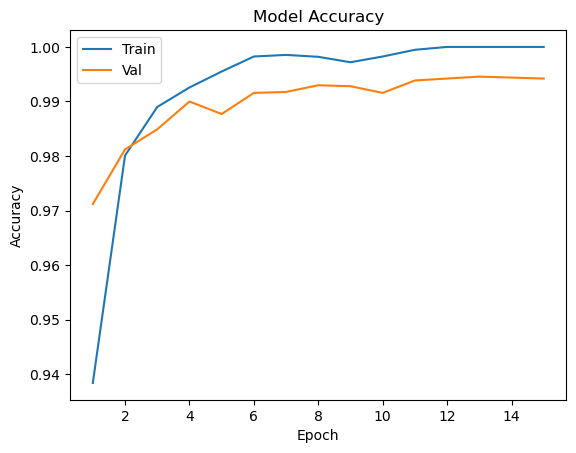

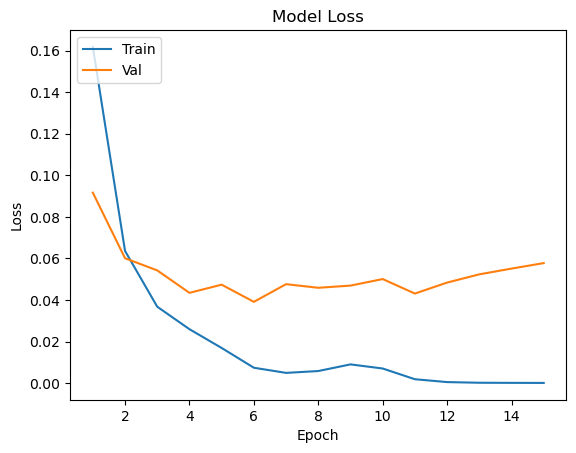

In [116]:
plot_learning_curve(history, NUMBER_OF_EPOCHS)

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay

In [118]:
# predicted_cnn = cnn_model.predict_classes(X_raw_test)
predicted_cnn = np.argmax(cnn_model.predict(X_raw_test), axis=-1)

# Print metrics
print(confusion_matrix(y_raw_test, predicted_cnn))
print(accuracy_score(y_raw_test, predicted_cnn))
print(f1_score(y_raw_test, predicted_cnn, average='micro'))
# ConfusionMatrixDisplay.from_predictions(y_raw_test, predicted_cnn)

178/178 [==============================] - 0s 2ms/step
[[2815   33]
 [   0 2847]]
0.9942054433713784
0.9942054433713784


In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_raw_test, predicted_cnn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2848
           1       0.99      1.00      0.99      2847

    accuracy                           0.99      5695
   macro avg       0.99      0.99      0.99      5695
weighted avg       0.99      0.99      0.99      5695



In [120]:
results = cnn_model.evaluate(X_raw_test, y_raw_test)
print("test loss, test acc: ", results)

178/178 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9942
test loss, test acc:  [0.05772363767027855, 0.9942054152488708]


In [201]:
cnn_unfiltered_cv_metrics = feature_util.cross_val_cnn(X_raw_train, y_raw_train, X_raw_train[0].shape, NUMBER_OF_EPOCHS, 5)
feature_util.compute_cnn_cross_val_mean(cnn_unfiltered_cv_metrics)

0.9923909783363343


In [205]:
# cnn_model.save('Final Models/exp2_cnn_unfiltered')

INFO:tensorflow:Assets written to: Final Models/exp2_cnn_unfiltered\assets


INFO:tensorflow:Assets written to: Final Models/exp2_cnn_unfiltered\assets


## II - Filtered

In [121]:
data_filtered = pd.read_csv("New Datasets/filtered_smartfall_training_dataset.csv")
data_filtered = pd.concat([data_filtered, pd.read_csv("New Datasets/filtered_smartfall_testing_dataset.csv")], axis=0).reset_index(drop=True)

data_filtered = data_filtered.drop(['Unnamed: 0'], axis=1)
data_filtered

,x_ax,y_ax,z_ax,outcome
0,1.058341,0.096574,0.112934,0
1,0.895934,0.178424,0.163770,0
2,0.813437,0.222202,0.169857,0
3,0.828629,0.216133,0.119465,0
4,0.894310,0.179974,0.040379,0
...,...,...,...,...
183801,0.855340,0.367065,0.089292,0
183802,0.750066,0.405776,0.084742,0
183803,0.692327,0.453963,0.054610,0
183804,0.705525,0.527850,-0.023513,0


In [122]:
X_filtered, y_filtered = feature_util.get_frames(data_filtered, frame_size, hop_size, True)
features_filtered = feature_util.extract_features(X_filtered)
features_filtered.shape

c:\Users\Alex\OneDrive - The University of Nottingham\Comp Sci\Year 3\Dissertation\Code\feature_util.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['outcome'][i: i + frame_size])[0][0]


(12252, 11)

In [123]:
feature_filtered_df = pd.DataFrame(features_filtered)

y_filtered_df = pd.DataFrame(y_filtered)
y_filtered_df = y_filtered_df.rename(mapper={0:"outcome"}, axis=1)
# y_df
# feature_and_outcome_df = pd.concat([feature_df, y_df], axis=1)

In [124]:
sm = SMOTE(random_state=42)

X_filtered_res, y_filtered_res = sm.fit_resample(feature_filtered_df, y_filtered_df)
y_filtered_res.value_counts()

outcome
0          11390
1          11390
dtype: int64

In [125]:
X_filtered_train, X_filtered_test, y_filtered_train, y_filtered_test = train_test_split(X_filtered_res, y_filtered_res, test_size=0.25, random_state=0, stratify=y_filtered_res)

In [126]:
X_filtered_train.shape, X_filtered_test.shape, y_filtered_train.shape, y_filtered_test.shape

((17085, 11), (5695, 11), (17085, 1), (5695, 1))

In [127]:
unique, counts = np.unique(y_filtered_train, return_counts=True)
dict(zip(unique, counts))

{0: 8542, 1: 8543}

### Traditional Machine Learning Methods

In [128]:
filtered_model_name_array = []
filtered_model_acc_array = []

In [129]:
knn_model_filtered = KNeighborsClassifier(n_neighbors=5)
knn_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [130]:
# Predict on the test set
predicted_knn_filtered = knn_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_knn_filtered))
print(accuracy_score(y_filtered_test, predicted_knn_filtered))
print(f1_score(y_filtered_test, predicted_knn_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("knn")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_knn_filtered))

[[2547  301]
 [  18 2829]]
0.9439859525899912
0.9439859525899912


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [131]:
# from sklearn.model_selection import GridSearchCV

# max_features_range = np.arange(1, 6, 1)
# n_estimators_range = np.arange(10, 210, 10)
# n_neighbors_range = np.arange(1, 100, 1)
# # param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range, n_neighbors = n_neighbors_range)
# param_grid = dict(n_neighbors = n_neighbors_range)

# knnTest = KNeighborsClassifier(n_neighbors=5)

# grid = GridSearchCV(estimator=knnTest, param_grid=param_grid, scoring='accuracy', cv=5)

# grid.fit(X_train, y_train)
# print("The best parameters are %s with a score of %f" % (grid.best_params_, grid.best_score_))

In [132]:
svm_model_filtered = svm.SVC(kernel='linear', C=1, random_state=0)
# gaussian
svm_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=0)

In [133]:
# Predict on the test set
predicted_svm_filtered = svm_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_svm_filtered))
print(accuracy_score(y_filtered_test, predicted_svm_filtered))
print(f1_score(y_filtered_test, predicted_svm_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("svm")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_svm_filtered))

[[2534  314]
 [ 252 2595]]
0.9006145741878842
0.9006145741878842


In [134]:
svm_rbf_model_filtered = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_rbf_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, random_state=0)

In [135]:
# Predict on the test set
predicted_svm_rbf_filtered = svm_rbf_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_svm_rbf_filtered))
print(accuracy_score(y_filtered_test, predicted_svm_rbf_filtered))
print(f1_score(y_filtered_test, predicted_svm_rbf_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("svm_rbf")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_svm_rbf_filtered))

[[2487  361]
 [ 181 2666]]
0.904828797190518
0.904828797190518


In [136]:
rf_model_filtered = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model_filtered.fit(X_filtered_train, y_filtered_train)

C:\Users\Alex\AppData\Local\Temp\ipykernel_15992\3673001609.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_filtered.fit(X_filtered_train, y_filtered_train)


RandomForestClassifier(random_state=42)

In [137]:
# Predict on the test set
predicted_rf_filtered = rf_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_rf_filtered))
print(accuracy_score(y_filtered_test, predicted_rf_filtered))
print(f1_score(y_filtered_test, predicted_rf_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("rf")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_rf_filtered))

[[2658  190]
 [  51 2796]]
0.9576821773485513
0.9576821773485513


In [138]:
nb_model_filtered = GaussianNB()
nb_model_filtered.fit(X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [139]:
# Predict on the test set
predicted_nb_filtered = nb_model_filtered.predict(X_filtered_test)

# Print metrics
print(confusion_matrix(y_filtered_test, predicted_nb_filtered))
print(accuracy_score(y_filtered_test, predicted_nb_filtered))
print(f1_score(y_filtered_test, predicted_nb_filtered, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_model_name_array.append("nb")
filtered_model_acc_array.append(accuracy_score(y_filtered_test, predicted_nb_filtered))

[[2626  222]
 [ 644 2203]]
0.8479367866549605
0.8479367866549605


In [140]:
best_trad_model_acc_filtered = max(filtered_model_acc_array)
index = filtered_model_acc_array.index(max(filtered_model_acc_array))
best_trad_model_filtered = filtered_model_name_array[index]
print(f"Best model: {best_trad_model_filtered}, Accuracy: {best_trad_model_acc_filtered}")

Best model: rf, Accuracy: 0.9576821773485513


In [141]:
for i in range(0, len(filtered_model_name_array)):
    print(f"name: {filtered_model_name_array[i]}, accuracy: {filtered_model_acc_array[i]}")

name: knn, accuracy: 0.9439859525899912
name: svm, accuracy: 0.9006145741878842
name: svm_rbf, accuracy: 0.904828797190518
name: rf, accuracy: 0.9576821773485513
name: nb, accuracy: 0.8479367866549605


In [142]:
filtered_model_dictionary = {"knn": knn_model_filtered,
                             "svm": svm_model_filtered,
                             "svm_rbf": svm_rbf_model_filtered,
                             "rf": rf_model_filtered,
                             "nb": nb_model_filtered}

In [143]:
scores_array_filtered = perform_cross_val_all_models(filtered_model_dictionary, X_filtered_train, y_filtered_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [144]:
for cv_tuple in scores_array_filtered:
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (cv_tuple[0], cv_tuple[1].mean(), cv_tuple[1].std() * 2))

knn Accuracy: 0.94 (+/- 0.00)
svm Accuracy: 0.90 (+/- 0.01)
svm_rbf Accuracy: 0.90 (+/- 0.01)
rf Accuracy: 0.96 (+/- 0.01)
nb Accuracy: 0.85 (+/- 0.00)


In [145]:
print_all_classification_reports(filtered_model_dictionary, X_filtered_test, y_filtered_test)

Classification report for knn


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2848
           1       0.90      0.99      0.95      2847

    accuracy                           0.94      5695
   macro avg       0.95      0.94      0.94      5695
weighted avg       0.95      0.94      0.94      5695

Classification report for svm
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2848
           1       0.89      0.91      0.90      2847

    accuracy                           0.90      5695
   macro avg       0.90      0.90      0.90      5695
weighted avg       0.90      0.90      0.90      5695

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2848
           1       0.88      0.94      0.91      2847

    accuracy                           0.90      5695
   macro avg       0.91      0.90      0.90      5695
weighted a

In [146]:
print_all_classification_reports_training(filtered_model_dictionary, X_filtered_train, y_filtered_train)

Classification report for knn


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8542
           1       0.93      1.00      0.96      8543

    accuracy                           0.96     17085
   macro avg       0.96      0.96      0.96     17085
weighted avg       0.96      0.96      0.96     17085

Classification report for svm
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8542
           1       0.90      0.90      0.90      8543

    accuracy                           0.90     17085
   macro avg       0.90      0.90      0.90     17085
weighted avg       0.90      0.90      0.90     17085

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      8542
           1       0.89      0.93      0.91      8543

    accuracy                           0.91     17085
   macro avg       0.91      0.91      0.91     17085
weighted a

In [147]:
from joblib import dump, load
# save clf using joblib
# dump(rf_model, 'New Models/rf_filtered_normalised.joblib')

### Deep Learning

#### The models below are trained using data which went through low-pass filter

In [148]:
X_filtered_smote, y_filtered_smote = feature_util.generate_windows_SMOTE(X_filtered, y_filtered)
X_filtered_smote.shape, y_filtered_smote.shape

((22780, 31, 3), (22780,))

In [149]:
# X_raw_filtered_train, X_raw_filtered_test, y_raw_filtered_train, y_raw_filtered_test = train_test_split(X_filtered, y_filtered, test_size=0.25, random_state=0, stratify=y_filtered)
X_raw_filtered_train, X_raw_filtered_test, y_raw_filtered_train, y_raw_filtered_test = train_test_split(X_filtered_smote, y_filtered_smote, test_size=0.25, random_state=0, stratify=y_filtered_smote)
X_raw_filtered_train.shape, X_raw_filtered_test.shape, y_raw_filtered_train.shape

((17085, 31, 3), (5695, 31, 3), (17085,))

In [150]:
X_raw_filtered_train[0].shape

(31, 3)

In [151]:
X_TRAIN_SIZE = X_raw_train.shape[0]
X_TEST_SIZE = X_raw_test.shape[0]
X_TRAIN_WINDOW_SIZE = X_raw_train.shape[1]
X_TEST_WINDOW_SIZE = X_raw_test.shape[1]

In [152]:
X_raw_filtered_train = X_raw_filtered_train.reshape(X_TRAIN_SIZE, X_TRAIN_WINDOW_SIZE, 3, 1)
X_raw_filtered_test = X_raw_filtered_test.reshape(X_TEST_SIZE, X_TRAIN_WINDOW_SIZE, 3, 1)

In [153]:
X_raw_filtered_train[0].shape, X_raw_filtered_test[0].shape

((31, 3, 1), (31, 3, 1))

In [154]:
cnn_model_filtered = Sequential()
cnn_model_filtered.add(Conv2D(16, (2, 2), activation='relu', input_shape=X_raw_filtered_train[0].shape))
cnn_model_filtered.add(Conv2D(32, (2, 2), activation='relu'))
cnn_model_filtered.add(Flatten())
cnn_model_filtered.add(Dense(64, activation='relu'))
cnn_model_filtered.add(Dense(2, activation='softmax'))


In [155]:
cnn_model_filtered.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [156]:
history_filtered = cnn_model_filtered.fit(X_raw_filtered_train, y_raw_filtered_train, epochs=NUMBER_OF_EPOCHS, validation_data=(X_raw_filtered_test, y_raw_filtered_test), verbose=1)

Epoch 1/15
534/534 [==============================] - 2s 2ms/step - loss: 0.1615 - accuracy: 0.9387 - val_loss: 0.1007 - val_accuracy: 0.9668
Epoch 2/15
534/534 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9721 - val_loss: 0.0766 - val_accuracy: 0.9765
Epoch 3/15
534/534 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9830 - val_loss: 0.0593 - val_accuracy: 0.9835
Epoch 4/15
534/534 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9882 - val_loss: 0.0586 - val_accuracy: 0.9837
Epoch 5/15
534/534 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9921 - val_loss: 0.0673 - val_accuracy: 0.9800
Epoch 6/15
534/534 [==============================] - 1s 2ms/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.0604 - val_accuracy: 0.9861
Epoch 7/15
534/534 [==============================] - 1s 2ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0495 - val_accuracy: 0.9891
Epoch 

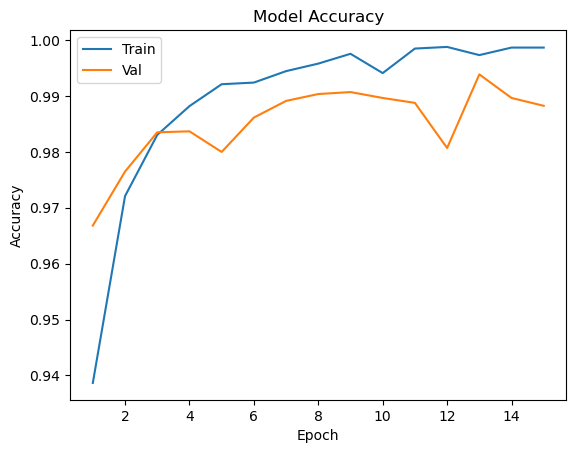

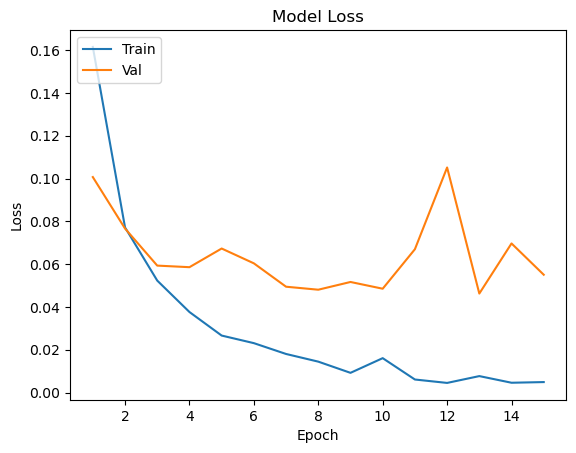

In [157]:
plot_learning_curve(history_filtered, NUMBER_OF_EPOCHS)

In [158]:
# predicted_cnn = cnn_model.predict_classes(X_raw_test)
predicted_cnn_filtered = np.argmax(cnn_model_filtered.predict(X_raw_filtered_test), axis=-1)

# Print metrics
print(confusion_matrix(y_raw_filtered_test, predicted_cnn_filtered))
print(accuracy_score(y_raw_filtered_test, predicted_cnn_filtered))
print(f1_score(y_raw_filtered_test, predicted_cnn_filtered, average='micro'))
# ConfusionMatrixDisplay.from_predictions(y_raw_test, predicted_cnn)

178/178 [==============================] - 0s 1ms/step
[[2817   31]
 [  36 2811]]
0.9882352941176471
0.9882352941176471


In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_raw_filtered_test, predicted_cnn_filtered))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2848
           1       0.99      0.99      0.99      2847

    accuracy                           0.99      5695
   macro avg       0.99      0.99      0.99      5695
weighted avg       0.99      0.99      0.99      5695



In [160]:
results_filtered = cnn_model_filtered.evaluate(X_raw_filtered_test, y_raw_filtered_test)
print("test loss, test acc: ", results_filtered)

178/178 [==============================] - 0s 1ms/step - loss: 0.0551 - accuracy: 0.9882
test loss, test acc:  [0.055050078779459, 0.9882352948188782]


In [202]:
cnn_filtered_cv_metrics = feature_util.cross_val_cnn(X_raw_filtered_train, y_raw_filtered_train, X_raw_filtered_train[0].shape, NUMBER_OF_EPOCHS, 5)
feature_util.compute_cnn_cross_val_mean(cnn_filtered_cv_metrics)

0.9892303228378296


## III - Filtered and Normalised

In [161]:
data_filtered_normalised = pd.read_csv("New Datasets/filtered_normalised_smartfall_training_dataset.csv")
data_filtered_normalised = pd.concat([data_filtered_normalised, pd.read_csv("New Datasets/filtered_normalised_smartfall_testing_dataset.csv")], axis=0).reset_index(drop=True)

data_filtered_normalised = data_filtered_normalised.drop(['Unnamed: 0'], axis=1)
data_filtered_normalised

,x_ax,y_ax,z_ax,outcome
0,0.480550,0.365079,0.546276,0
1,0.465597,0.373657,0.550988,0
2,0.458001,0.378245,0.551552,0
3,0.459400,0.377609,0.546882,0
4,0.465448,0.373819,0.539552,0
...,...,...,...,...
183801,0.314151,0.436371,0.556205,0
183802,0.304108,0.440144,0.555801,0
183803,0.298599,0.444842,0.553127,0
183804,0.299858,0.452044,0.546193,0


In [162]:
X_filtered_normalised, y_filtered_normalised = feature_util.get_frames(data_filtered_normalised, frame_size, hop_size, True)
features_filtered_normalised = feature_util.extract_features(X_filtered_normalised)
features_filtered_normalised.shape

c:\Users\Alex\OneDrive - The University of Nottingham\Comp Sci\Year 3\Dissertation\Code\feature_util.py:22: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['outcome'][i: i + frame_size])[0][0]


(12252, 11)

In [163]:
feature_filtered_normalised_df = pd.DataFrame(features_filtered_normalised)

y_filtered_normalised_df = pd.DataFrame(y_filtered_normalised)
y_filtered_normalised_df = y_filtered_normalised_df.rename(mapper={0:"outcome"}, axis=1)
# y_df
# feature_and_outcome_df = pd.concat([feature_df, y_df], axis=1)

In [164]:
sm = SMOTE(random_state=42)

X_filtered_normalised_res, y_filtered_normalised_res = sm.fit_resample(feature_filtered_normalised_df, y_filtered_normalised_df)
y_filtered_normalised_res.value_counts()

outcome
0          11390
1          11390
dtype: int64

In [165]:
X_filtered_normalised_train, X_filtered_normalised_test, y_filtered_normalised_train, y_filtered_normalised_test = train_test_split(X_filtered_normalised_res, y_filtered_normalised_res, test_size=0.25, random_state=0, stratify=y_filtered_normalised_res)

In [166]:
X_filtered_normalised_train.shape, X_filtered_normalised_test.shape, y_filtered_normalised_train.shape, y_filtered_normalised_test.shape

((17085, 11), (5695, 11), (17085, 1), (5695, 1))

In [167]:
unique, counts = np.unique(y_filtered_train, return_counts=True)
dict(zip(unique, counts))

{0: 8542, 1: 8543}

### Traditional Machine Learning Methods

In [168]:
filtered_normalised_model_name_array = []
filtered_normalised_model_acc_array = []

In [169]:
knn_model_filtered_normalised = KNeighborsClassifier(n_neighbors=5)
knn_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [170]:
# Predict on the test set
predicted_knn_filtered_normalised = knn_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_knn_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_knn_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_knn_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("knn")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_knn_filtered_normalised))

[[2533  315]
 [  11 2836]]
0.942756804214223
0.942756804214223


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [171]:
# from sklearn.model_selection import GridSearchCV

# max_features_range = np.arange(1, 6, 1)
# n_estimators_range = np.arange(10, 210, 10)
# n_neighbors_range = np.arange(1, 100, 1)
# # param_grid = dict(max_features = max_features_range, n_estimators = n_estimators_range, n_neighbors = n_neighbors_range)
# param_grid = dict(n_neighbors = n_neighbors_range)

# knnTest = KNeighborsClassifier(n_neighbors=5)

# grid = GridSearchCV(estimator=knnTest, param_grid=param_grid, scoring='accuracy', cv=5)

# grid.fit(X_train, y_train)
# print("The best parameters are %s with a score of %f" % (grid.best_params_, grid.best_score_))

In [172]:
svm_model_filtered_normalised = svm.SVC(kernel='linear', C=1, random_state=0)
# gaussian
svm_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear', random_state=0)

In [173]:
# Predict on the test set
predicted_svm_filtered_normalised = svm_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_svm_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_svm_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_svm_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("svm")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_svm_filtered_normalised))

[[2492  356]
 [ 290 2557]]
0.8865671641791045
0.8865671641791045


In [174]:
svm_rbf_model_filtered_normalised = svm.SVC(kernel='rbf', C=1, random_state=0)
svm_rbf_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, random_state=0)

In [175]:
# Predict on the test set
predicted_svm_rbf_filtered_normalised = svm_rbf_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("svm_rbf")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_svm_rbf_filtered_normalised))

[[2427  421]
 [ 238 2609]]
0.8842844600526778
0.8842844600526778


In [176]:
rf_model_filtered_normalised = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model_filtered_normalised.fit(X_filtered_train, y_filtered_normalised_train)

C:\Users\Alex\AppData\Local\Temp\ipykernel_15992\1829240526.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_filtered_normalised.fit(X_filtered_train, y_filtered_normalised_train)


RandomForestClassifier(random_state=42)

In [177]:
# Predict on the test set
predicted_rf_filtered_normalised = rf_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_rf_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_rf_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_rf_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("rf")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_rf_filtered_normalised))

[[2848    0]
 [2847    0]]
0.5000877963125548
0.5000877963125548


In [178]:
nb_model_filtered_normalised = GaussianNB()
nb_model_filtered_normalised.fit(X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [179]:
# Predict on the test set
predicted_nb_filtered_normalised = nb_model_filtered_normalised.predict(X_filtered_normalised_test)

# Print metrics
print(confusion_matrix(y_filtered_normalised_test, predicted_nb_filtered_normalised))
print(accuracy_score(y_filtered_normalised_test, predicted_nb_filtered_normalised))
print(f1_score(y_filtered_normalised_test, predicted_nb_filtered_normalised, average='micro'))
# compare_trad_models("knn", accuracy_score(y_test, predicted))
filtered_normalised_model_name_array.append("nb")
filtered_normalised_model_acc_array.append(accuracy_score(y_filtered_normalised_test, predicted_nb_filtered_normalised))

[[2649  199]
 [ 770 2077]]
0.8298507462686567
0.8298507462686567


In [180]:
best_trad_model_acc_filtered_normalised = max(filtered_normalised_model_acc_array)
index = filtered_normalised_model_acc_array.index(max(filtered_normalised_model_acc_array))
best_trad_model_filtered_normalised = filtered_normalised_model_name_array[index]
print(f"Best model: {best_trad_model_filtered_normalised}, Accuracy: {best_trad_model_acc_filtered_normalised}")

Best model: knn, Accuracy: 0.942756804214223


In [181]:
for i in range(0, len(filtered_normalised_model_name_array)):
    print(f"name: {filtered_normalised_model_name_array[i]}, accuracy: {filtered_normalised_model_acc_array[i]}")

name: knn, accuracy: 0.942756804214223
name: svm, accuracy: 0.8865671641791045
name: svm_rbf, accuracy: 0.8842844600526778
name: rf, accuracy: 0.5000877963125548
name: nb, accuracy: 0.8298507462686567


In [182]:
filtered_normalised_model_dictionary = {"knn": knn_model_filtered_normalised,
                             "svm": svm_model_filtered_normalised,
                             "svm_rbf": svm_rbf_model_filtered_normalised,
                             "rf": rf_model_filtered_normalised,
                             "nb": nb_model_filtered_normalised}

In [183]:
scores_array_filtered_normalised = perform_cross_val_all_models(filtered_normalised_model_dictionary, X_filtered_normalised_train, y_filtered_normalised_train)

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

In [184]:
for cv_tuple in scores_array_filtered_normalised:
    print("%s Accuracy: %0.2f (+/- %0.2f)" % (cv_tuple[0], cv_tuple[1].mean(), cv_tuple[1].std() * 2))

knn Accuracy: 0.94 (+/- 0.01)
svm Accuracy: 0.89 (+/- 0.00)
svm_rbf Accuracy: 0.89 (+/- 0.01)
rf Accuracy: 0.95 (+/- 0.01)
nb Accuracy: 0.83 (+/- 0.02)


In [185]:
print_all_classification_reports(filtered_normalised_model_dictionary, X_filtered_normalised_test, y_filtered_normalised_test)

Classification report for knn
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2848
           1       0.90      1.00      0.95      2847

    accuracy                           0.94      5695
   macro avg       0.95      0.94      0.94      5695
weighted avg       0.95      0.94      0.94      5695

Classification report for svm


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2848
           1       0.88      0.90      0.89      2847

    accuracy                           0.89      5695
   macro avg       0.89      0.89      0.89      5695
weighted avg       0.89      0.89      0.89      5695

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2848
           1       0.86      0.92      0.89      2847

    accuracy                           0.88      5695
   macro avg       0.89      0.88      0.88      5695
weighted avg       0.89      0.88      0.88      5695

Classification report for rf
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2848
           1       0.00      0.00      0.00      2847

    accuracy                           0.50      5695
   macro avg       0.25      0.50      0.33      5695
weighted av

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
print_all_classification_reports_training(filtered_normalised_model_dictionary, X_filtered_normalised_train, y_filtered_normalised_train)

Classification report for knn


c:\Users\Alex\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      0.92      0.95      8542
           1       0.92      1.00      0.96      8543

    accuracy                           0.96     17085
   macro avg       0.96      0.96      0.96     17085
weighted avg       0.96      0.96      0.96     17085

Classification report for svm
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      8542
           1       0.88      0.89      0.89      8543

    accuracy                           0.89     17085
   macro avg       0.89      0.89      0.89     17085
weighted avg       0.89      0.89      0.89     17085

Classification report for svm_rbf
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      8542
           1       0.87      0.92      0.89      8543

    accuracy                           0.89     17085
   macro avg       0.89      0.89      0.89     17085
weighted a

c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
from joblib import dump, load
# save clf using joblib
# dump(rf_model, 'New Models/rf_filtered_normalised.joblib')
# dump(rf_model, 'Final Models/exp2_rf_unfiltered.joblib')

['Final Models/exp2_rf_unfiltered.joblib']

### Deep Learning

#### The models below are trained using data which went through low-pass filter

In [188]:
X_filtered_normalised_smote, y_filtered_normalised_smote = feature_util.generate_windows_SMOTE(X_filtered_normalised, y_filtered_normalised)
X_filtered_normalised_smote.shape, y_filtered_normalised_smote.shape

((22780, 31, 3), (22780,))

In [189]:
# X_raw_filtered_normalised_train, X_raw_filtered_normalised_test, y_raw_filtered_normalised_train, y_raw_filtered_normalised_test = train_test_split(X_filtered_normalised, y_filtered_normalised, test_size=0.25, random_state=0, stratify=y_filtered_normalised)
X_raw_filtered_normalised_train, X_raw_filtered_normalised_test, y_raw_filtered_normalised_train, y_raw_filtered_normalised_test = train_test_split(X_filtered_normalised_smote, y_filtered_normalised_smote, test_size=0.25, random_state=0, stratify=y_filtered_normalised_smote)
X_raw_filtered_normalised_train.shape, X_raw_filtered_normalised_test.shape, y_raw_filtered_normalised_train.shape

((17085, 31, 3), (5695, 31, 3), (17085,))

In [190]:
X_raw_filtered_normalised_train[0].shape

(31, 3)

In [191]:
X_raw_filtered_normalised_train = X_raw_filtered_normalised_train.reshape(X_TRAIN_SIZE, X_TRAIN_WINDOW_SIZE, 3, 1)
X_raw_filtered_normalised_test = X_raw_filtered_normalised_test.reshape(X_TEST_SIZE, X_TEST_WINDOW_SIZE, 3, 1)

In [192]:
X_raw_filtered_normalised_train[0].shape, X_raw_filtered_normalised_test[0].shape

((31, 3, 1), (31, 3, 1))

In [193]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [194]:
cnn_model_filtered_normalised = Sequential()
cnn_model_filtered_normalised.add(Conv2D(16, (2, 2), activation='relu', input_shape=X_raw_filtered_normalised_train[0].shape))
cnn_model_filtered_normalised.add(Conv2D(32, (2, 2), activation='relu'))
cnn_model_filtered_normalised.add(Flatten())
cnn_model_filtered_normalised.add(Dense(64, activation='relu'))
cnn_model_filtered_normalised.add(Dense(2, activation='softmax'))

In [195]:
cnn_model_filtered_normalised.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [196]:
history_filtered_normalised = cnn_model_filtered_normalised.fit(X_raw_filtered_normalised_train, y_raw_filtered_normalised_train, epochs=NUMBER_OF_EPOCHS, validation_data=(X_raw_filtered_normalised_test, y_raw_filtered_normalised_test), verbose=1)

Epoch 1/15
534/534 [==============================] - 2s 2ms/step - loss: 0.3990 - accuracy: 0.8241 - val_loss: 0.2438 - val_accuracy: 0.9104
Epoch 2/15
534/534 [==============================] - 1s 2ms/step - loss: 0.2477 - accuracy: 0.9097 - val_loss: 0.2286 - val_accuracy: 0.9136
Epoch 3/15
534/534 [==============================] - 1s 2ms/step - loss: 0.2209 - accuracy: 0.9195 - val_loss: 0.2010 - val_accuracy: 0.9264
Epoch 4/15
534/534 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9265 - val_loss: 0.1924 - val_accuracy: 0.9266
Epoch 5/15
534/534 [==============================] - 1s 2ms/step - loss: 0.1784 - accuracy: 0.9353 - val_loss: 0.1743 - val_accuracy: 0.9375
Epoch 6/15
534/534 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.9408 - val_loss: 0.1637 - val_accuracy: 0.9347
Epoch 7/15
534/534 [==============================] - 1s 2ms/step - loss: 0.1467 - accuracy: 0.9450 - val_loss: 0.1469 - val_accuracy: 0.9431
Epoch 

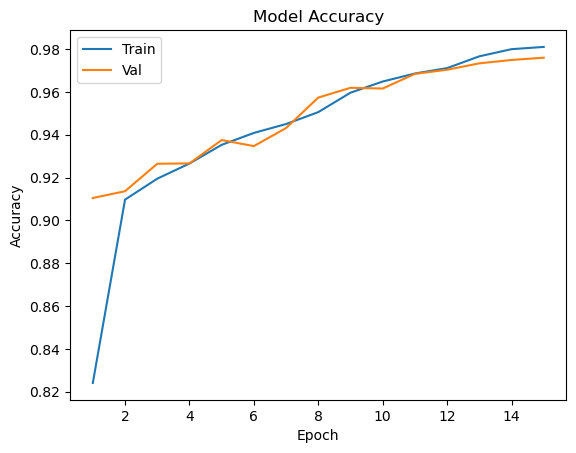

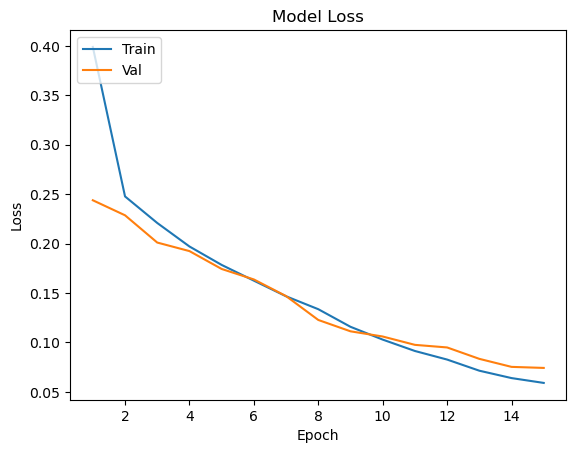

In [197]:
plot_learning_curve(history_filtered_normalised, NUMBER_OF_EPOCHS)

In [198]:
# predicted_cnn = cnn_model.predict_classes(X_raw_test)
predicted_cnn_filtered_normalised = np.argmax(cnn_model_filtered_normalised.predict(X_raw_filtered_normalised_test), axis=-1)

# Print metrics
print(confusion_matrix(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised))
print(accuracy_score(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised))
print(f1_score(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised, average='micro'))
# ConfusionMatrixDisplay.from_predictions(y_raw_test, predicted_cnn)

178/178 [==============================] - 0s 1ms/step
[[2762   86]
 [  51 2796]]
0.9759438103599649
0.9759438103599649


In [199]:
from sklearn.metrics import classification_report

print(classification_report(y_raw_filtered_normalised_test, predicted_cnn_filtered_normalised))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2848
           1       0.97      0.98      0.98      2847

    accuracy                           0.98      5695
   macro avg       0.98      0.98      0.98      5695
weighted avg       0.98      0.98      0.98      5695



In [200]:
results_filtered_normalised = cnn_model_filtered.evaluate(X_raw_filtered_normalised_test, y_raw_filtered_normalised_test)
print("test loss, test acc: ", results_filtered_normalised)

178/178 [==============================] - 0s 1ms/step - loss: 5.9048 - accuracy: 0.5001
test loss, test acc:  [5.904838562011719, 0.5000877976417542]


In [203]:
cnn_filtered_normalised_cv_metrics = feature_util.cross_val_cnn(X_raw_filtered_normalised_train, y_raw_filtered_normalised_train, X_raw_filtered_normalised_train[0].shape, NUMBER_OF_EPOCHS, 5)
feature_util.compute_cnn_cross_val_mean(cnn_filtered_normalised_cv_metrics)

0.9694468736648559
